In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

----

# YOLO Detection

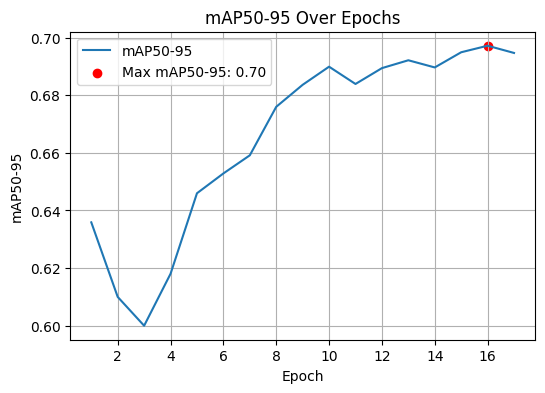

In [76]:
csv_log_path = os.path.join(os.getcwd(), "ckpts", "YOLO", "YOLODET", "results.csv")
data = pd.read_csv(csv_log_path)
data.plot(x="epoch", y=["metrics/mAP50-95(B)"], kind="line", figsize=(6, 4))
plt.scatter(data["epoch"][data["metrics/mAP50-95(B)"].idxmax()], data["metrics/mAP50-95(B)"].max(), color='red', label='Max mAP50-95')
plt.title("mAP50-95 Over Epochs")
plt.xlabel("Epoch")
plt.legend([f"mAP50-95", f"Max mAP50-95: {data['metrics/mAP50-95(B)'].max():.2f}"])
plt.ylabel("mAP50-95")
plt.grid()

----

# YOLO Segmentation

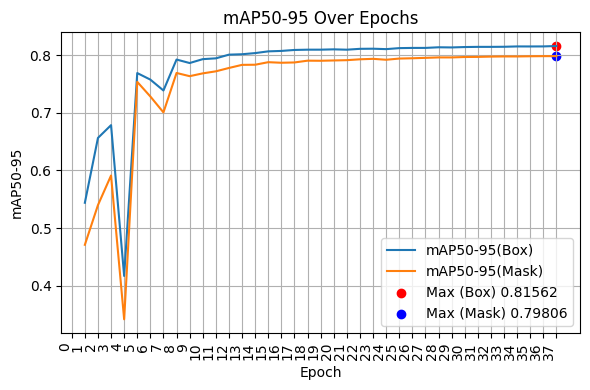

In [79]:
csv_log_path = os.path.join(os.getcwd(), "ckpts", "YOLO", "YOLOSEG", "results.csv")
data = pd.read_csv(csv_log_path)
data.plot(x="epoch", y=["metrics/mAP50-95(B)", "metrics/mAP50-95(M)"], kind="line", figsize=(6, 4))
plt.scatter(data["epoch"][data["metrics/mAP50-95(B)"].idxmax()], data["metrics/mAP50-95(B)"].max(), color='red', label='Max mAP50-95(B)')
plt.scatter(data["epoch"][data["metrics/mAP50-95(M)"].idxmax()], data["metrics/mAP50-95(M)"].max(), color='blue', label='Max mAP50-95(M)')
plt.title("mAP50-95 Over Epochs")
plt.xlabel("Epoch")
plt.legend([f"mAP50-95(Box)", f"mAP50-95(Mask)", f"Max (Box) {data['metrics/mAP50-95(B)'].max()}", f"Max (Mask) {data['metrics/mAP50-95(M)'].max()}"])
plt.ylabel("mAP50-95")
plt.xticks(range(0, data["epoch"].max() + 1, 1), rotation=90, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

---

# EfficientNetV2 F1 Score

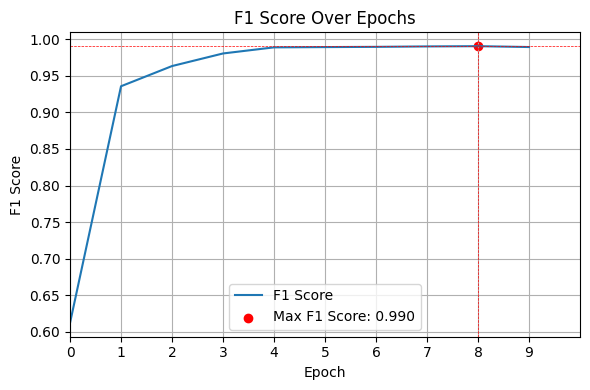

In [81]:

csv_log_path = os.path.join(os.getcwd(), "ckpts", "EFFICIENTNET", "logs", "efficientnet", "version_0", "metrics.csv")

data = pd.read_csv(csv_log_path)
data.plot(x="epoch", y=["eval/f1"], kind="line", figsize=(6, 4))
plt.title("F1 Score Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.xlim(left=0, right=data["epoch"].max() + 1)
plt.scatter(data["epoch"][data["eval/f1"].idxmax()], data["eval/f1"].max(), color='red', label='Max F1 Score')
plt.xticks(range(0, data["epoch"].max() + 1))
plt.axhline(y=data["eval/f1"].max(), color='red', linestyle='--', linewidth=0.5)
plt.axvline(x=data["epoch"][data["eval/f1"].idxmax()], color='red', linestyle='--', linewidth=0.5)
plt.grid()
plt.legend([f"F1 Score", f"Max F1 Score: {data['eval/f1'].max():.3f}"])
plt.tight_layout()
plt.show()

----

# MLP

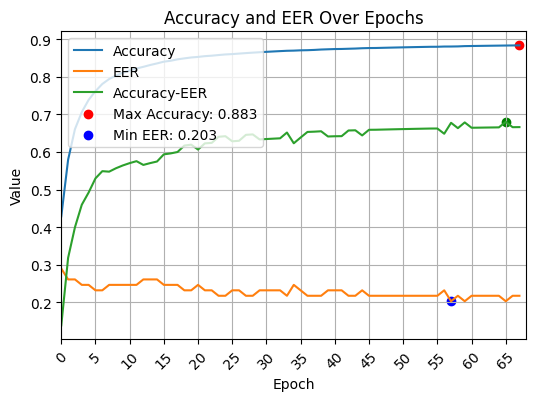

In [74]:
csv_log_path = os.path.join(os.getcwd(), "ckpts", "MLPMATCHER", "logs", "mlp", "version_0", "metrics.csv")
data = pd.read_csv(csv_log_path)
data = data.dropna()

data.plot(x="epoch", y=["eval/accuracy", "eval/eer", "eval/acc+eer"], kind="line", figsize=(6, 4))
plt.title("Accuracy and EER Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xlim(left=0, right=data["epoch"].max() + 1)
plt.scatter(data["epoch"][data["eval/accuracy"].idxmax()], data["eval/accuracy"].max(), color='red', label='Max Accuracy')
plt.scatter(data["epoch"][data["eval/eer"].idxmin()], data["eval/eer"].min(), color='blue', label='Min EER')
plt.scatter(data["epoch"][data["eval/acc+eer"].idxmax()], data["eval/acc+eer"].max(), color='green', label='Max Accuracy+EER')
plt.xticks(range(0, data["epoch"].max() + 1, 5), rotation=45)
plt.grid()
plt.legend([f"Accuracy", f"EER", "Accuracy-EER", f"Max Accuracy: {data['eval/accuracy'].max():.3f}", f"Min EER: {data['eval/eer'].min():.3f}"],
           loc='upper left')
plt.show()